In [1]:
import torch
from torch import nn

import sklearn.datasets
from matplotlib import pyplot as plt
import numpy as np

In [97]:
X, Y = sklearn.datasets.make_blobs(
    n_samples=100,
    n_features=2,
    centers=2,
    random_state=1,
)

X = torch.tensor(X).float()
Y = torch.tensor(Y).float()

z = nn.Linear(2, 1)
y = nn.Sigmoid()

In [98]:
def compute_cost():
    w0, w1, b = z.weight[0,0], z.weight[0,1], z.bias

    costs = torch.empty(len(Y), 1)
    for i in range(len(Y)):
        x0, x1, yt = X[i,0], X[i,1], Y[i]
        y_model = y(z(x0, x1))
        costs[i,0] = H(y_model, yt)

    return costs.mean(0).item()

def draw():
    plt.figure()
    w0, w1, b = z.weight[0,0], z.weight[0,1], z.bias[0]
    min_x, max_x = X.min(dim=0).values, X.max(dim=0).values
    line = lambda x:-w0.detach()/w1.detach() * x - b.detach()/w1.detach()
    x0   = torch.tensor([min_x[0], max_x[0]])
    x1   = line(x0)
    
    plt.plot(x0, x1);
    plt.scatter(X[:, 0], X[:, 1],
              c=Y, cmap="Greys", edgecolor="black");

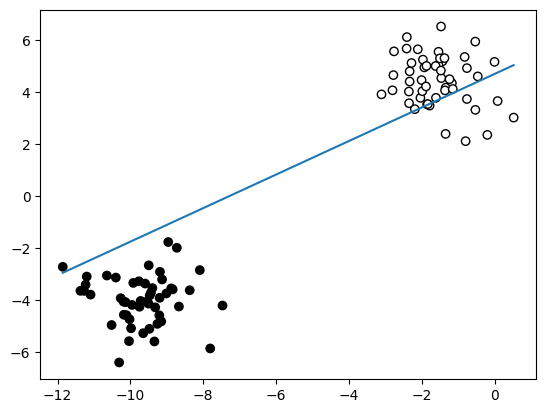

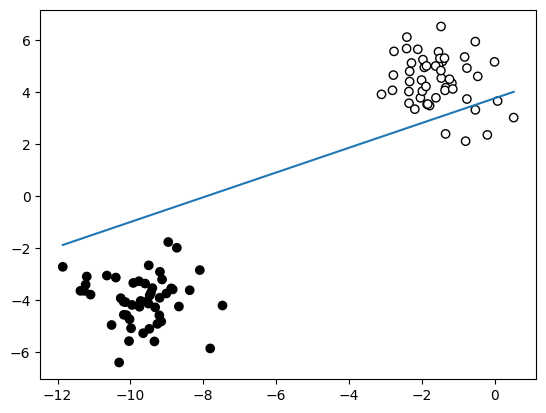

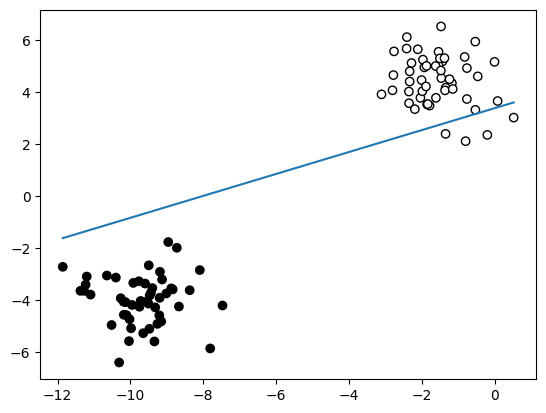

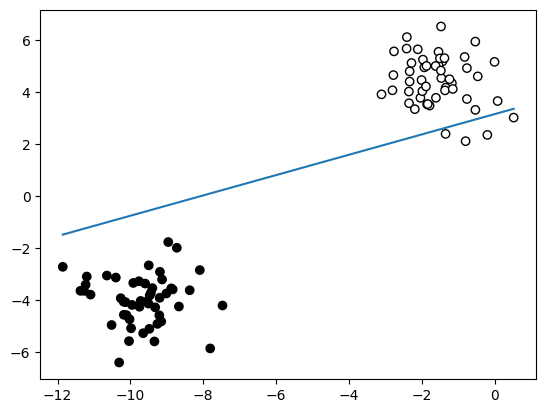

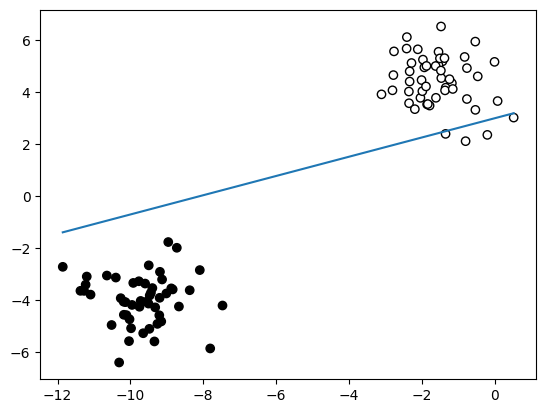

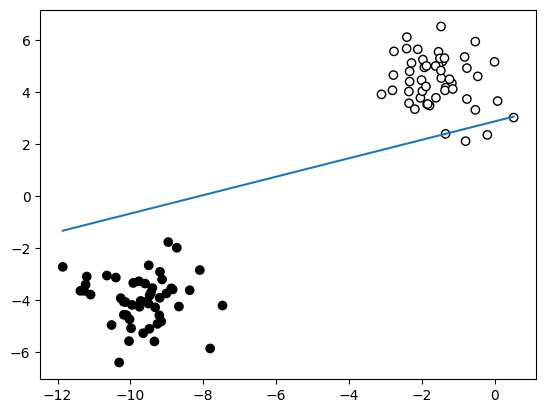

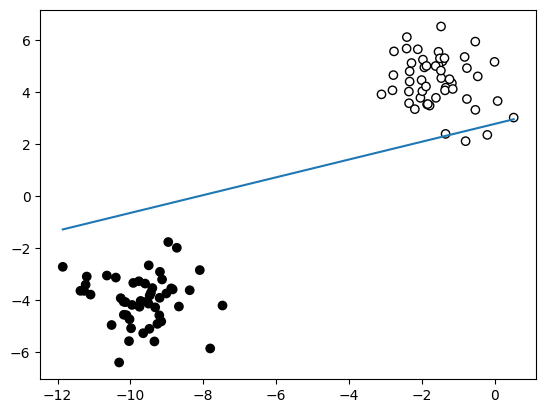

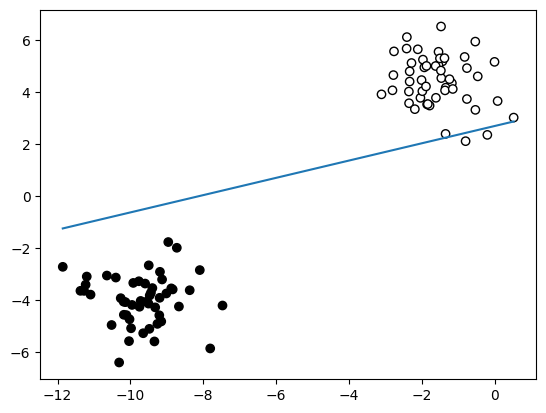

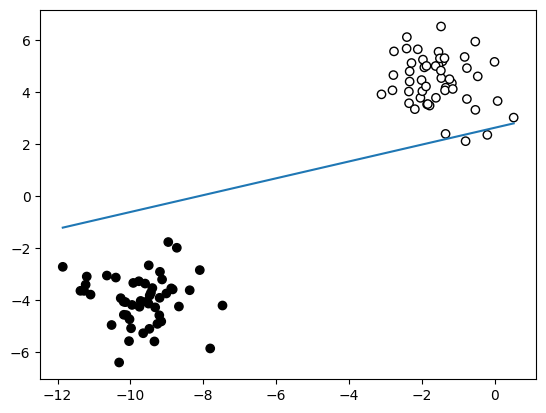

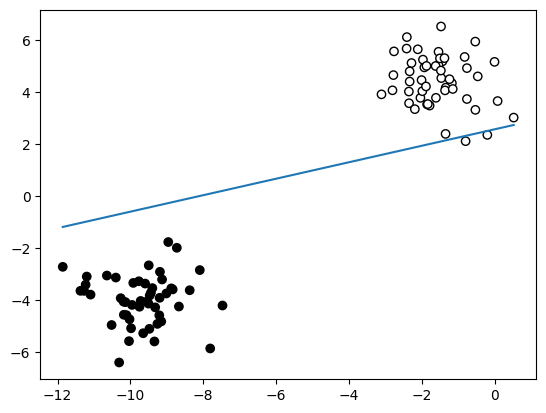

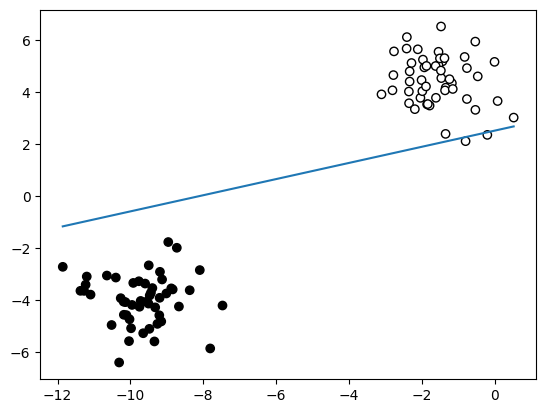

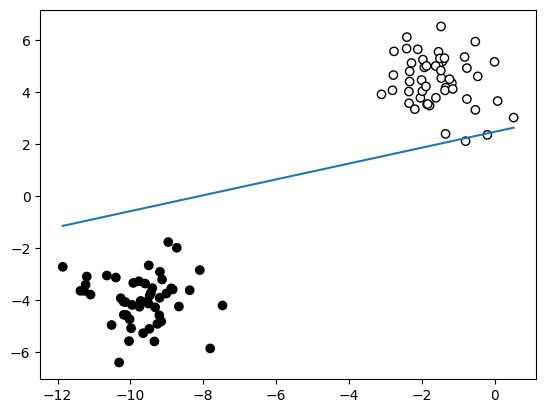

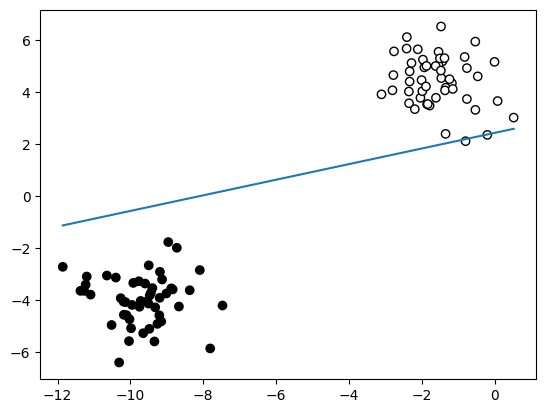

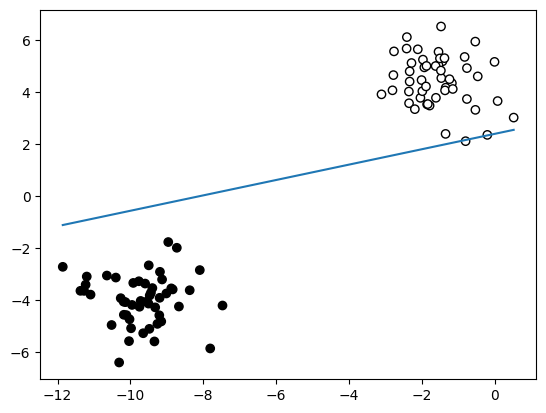

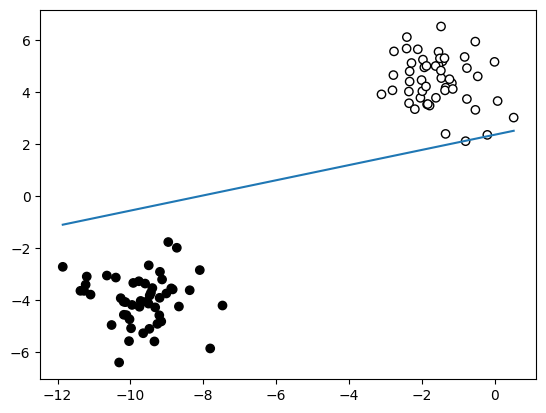

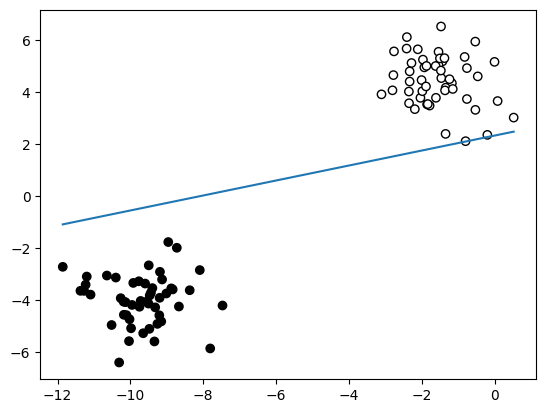

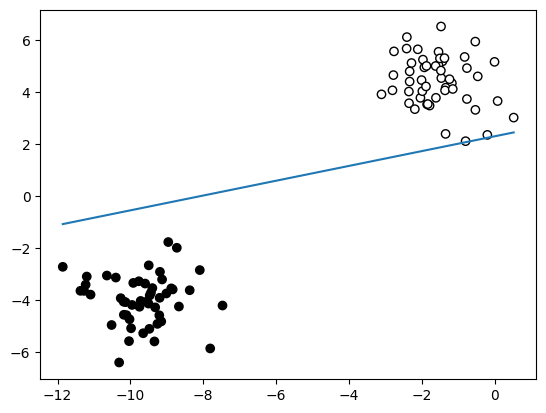

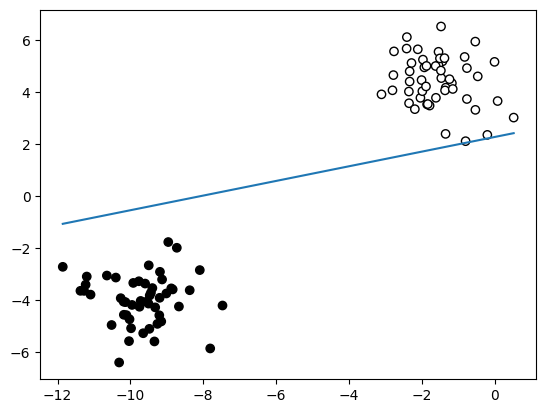

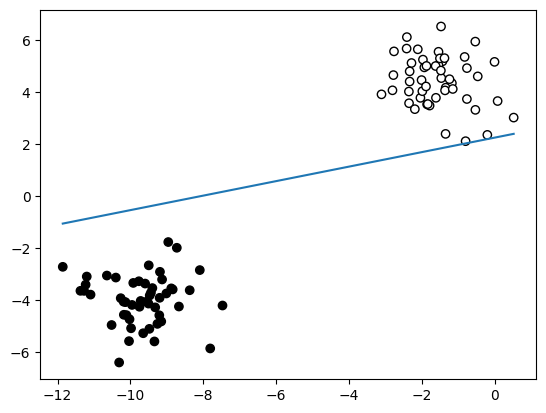

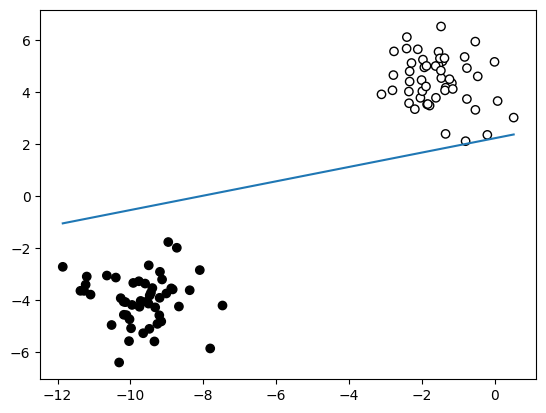

In [110]:
# initialization
p = torch.tensor(1), torch.tensor(-1), torch.tensor(5.5)
alpha = 0.1
epochs = 100

with torch.no_grad():
 z.weight[0,0], z.weight[0,1], z.bias[0] = (1, -1, 5.5)
    
# print("(w0,w1,b)", z.weight[0,0], z.weight[0,1], z.bias, "\n", sep="\n")

losses = torch.empty(epochs)

for epoch in range(epochs):
    z.zero_grad()

    y_model = torch.squeeze(y(z(X)))

    loss = -1 * ((Y * torch.log(y_model)) + (1-Y)*torch.log(1-y_model)).mean()
    # loss = -1/len(Y) * torch.sum(Y*torch.log(y_model) + (1-Y)*torch.log(1-y_model))
    loss.backward()
    
    with torch.no_grad():
        z.weight -= alpha * z.weight.grad
        z.bias -= alpha * z.bias.grad

        if epoch % 5 == 0:
            draw()
